## Task # 5 - To explore Business Analytics

Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’ You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. 

What all business problems you can derive by looking into the data? You can choose any of the tool of your choice (Python/R/Tableau/PowerBI/Excel)

Dataset:
https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1. Reading Data

In [2]:
data= pd.read_csv("SampleSuperstore.csv")
data.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## 2.Counting Unique Occurrences of Values in a Column

In [6]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
data['Postal Code'].value_counts()

10035    263
10024    230
10009    229
94122    203
10011    193
        ... 
33458      1
95616      1
48307      1
61832      1
59102      1
Name: Postal Code, Length: 631, dtype: int64

In [8]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [9]:
data['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

In [10]:
data['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Tinley Park        1
Cheyenne           1
Pico Rivera        1
Lindenhurst        1
Portage            1
Name: City, Length: 531, dtype: int64

In [11]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [12]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [13]:
data.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [14]:
data.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

## 3.Cleaning Data

In [15]:
len(data.value_counts())

9977

In [16]:
data.duplicated().sum() #getting duplicate rows

17

In [17]:
data.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
data.shape

(9977, 13)

In [18]:
data.corr()

Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023476  0.013110  0.059225 -0.029892
Sales          -0.023476  1.000000  0.200722 -0.028311  0.479067
Quantity        0.013110  0.200722  1.000000  0.008678  0.066211
Discount        0.059225 -0.028311  0.008678  1.000000 -0.219662
Profit         -0.029892  0.479067  0.066211 -0.219662  1.000000

In [19]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## 4. Analysing Datasets

#### 4.1.Pair-plot

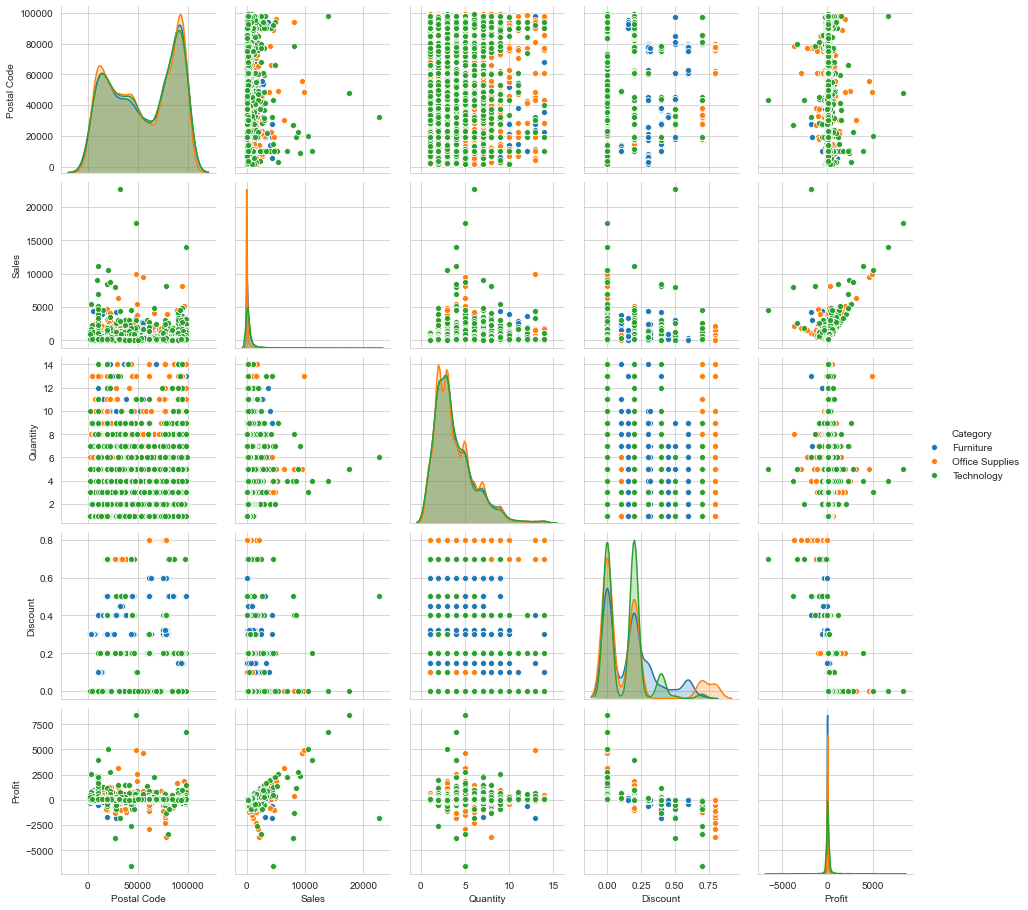

In [20]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data, hue= 'Category')
plt.show()

*Profit and Sales seems to be the important features.*

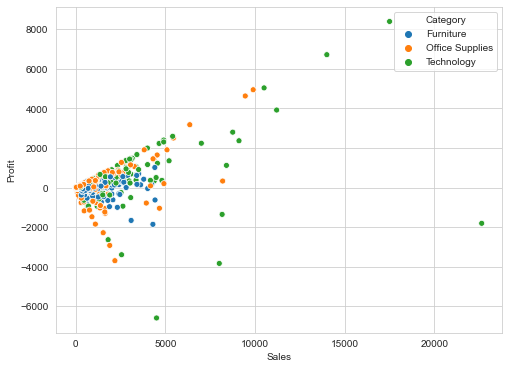

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(data['Sales'].values, data['Profit'].values, hue=data['Category'])
sns.set_style('whitegrid')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

Observations:
1. With increase in sales there is increase in profit.
2. Sale beyond 10,000 has led to much more increase in profit specially in the Technology category.

In [22]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(data.groupby("State")["Profit"].agg('sum')).reset_index()
temp.columns = ['state', 'profit']
temp.sort_values(by=['profit'], inplace=True)
print("States with lowest profit")
print(temp.head(5))
print('='*50)
print("States with highest profit")
print(temp.tail(5))

States with lowest profit
             state      profit
41           Texas -25750.9833
33            Ohio -16959.3178
36    Pennsylvania -15565.4035
11        Illinois -12601.6500
31  North Carolina  -7490.9122
States with highest profit
         state      profit
44    Virginia  18597.9504
20    Michigan  24428.0903
45  Washington  33368.2375
30    New York  74015.4622
3   California  76330.7891


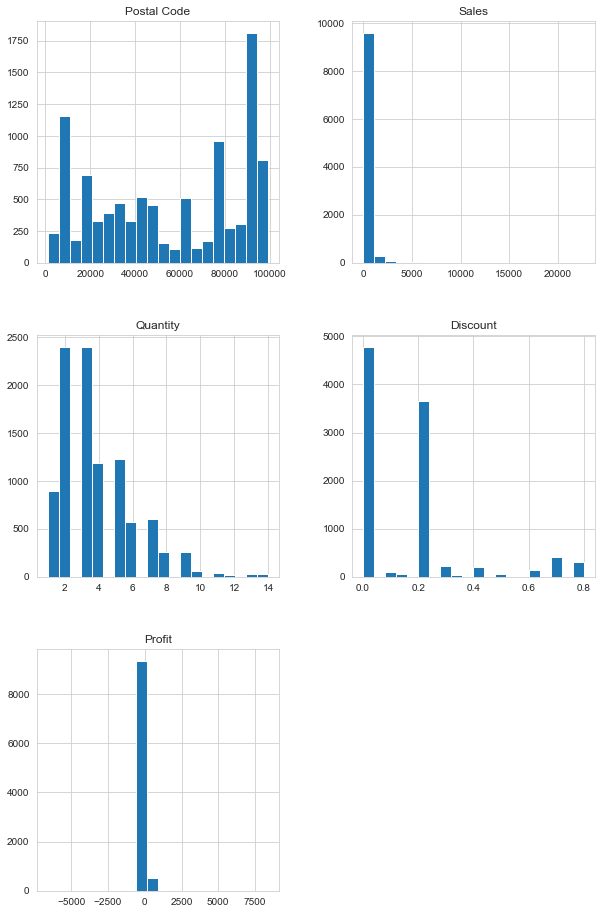

In [43]:
#plotting histogram
data.hist(bins=20, figsize=(10,16))
plt.show()

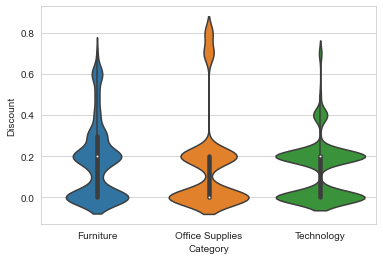

In [23]:
sns.violinplot(x='Category',y='Discount', data=data)
plt.show()

Observations:
1. The discount distribution varies in a similar fashion for all the categories.

2. For Furniture, 50% of times discount of less than 20% have been given. Mostly discount value of 0 and 20% are given on furniture products, also discount of 60% and more have been provided but very few times. Maximum value of discount goes upto 79% for Furniture category products.

3. For Office Supplies, 50% times discount of 0 has been provided and 75% of times products have got 20% discount value. Very few times discount of more than 60% have also been provided. Maximum discount of 85% have been given to the office products.

4. For Technology, 50th percentile lies on 0.2 value which means 50% times discount of less than 20% has been given.Discount value of approx 40% have also been given to few times. Maximum value of discount goes upto 78% for products under Technology category. 

Text(0.5, 1.0, 'Category')

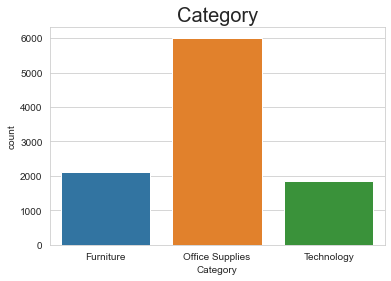

In [26]:
ax=sns.countplot(data['Category'],data=data)
plt.title('Category',fontsize=20)

Observation:\
The number of Office Supplies are the highest which implies that their sales are also high in the United States as compared to furniture and technology.

Text(0.5, 1.0, 'Region')

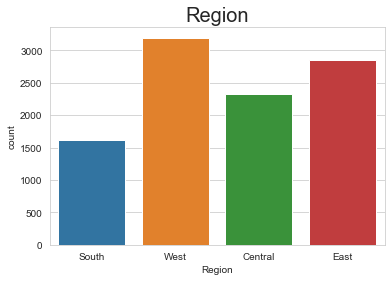

In [27]:
ax=sns.countplot(data['Region'],data=data)
plt.title('Region',fontsize=20)

Observation:\
The counts are highighest for West region, East lies at the second position, then Central region and the least demand is from South region, this implies that sales in the West and East regions are higher comparitively.

Text(0.5, 1.0, 'Sub-Category')

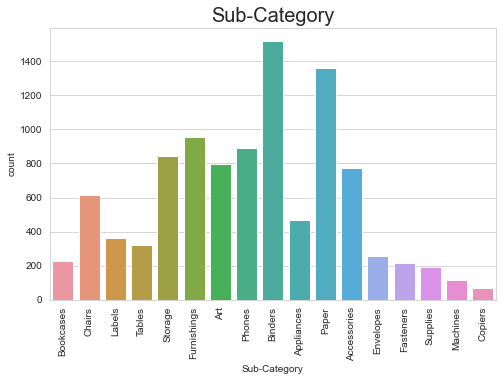

In [28]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data['Sub-Category'],data=data)
plt.xticks(rotation=90)
plt.title('Sub-Category',fontsize=20)

Observation:\
Binders and Paper have higher demands whereas Machines and Copiers have least demands.

Text(0.5, 1.0, 'Segment')

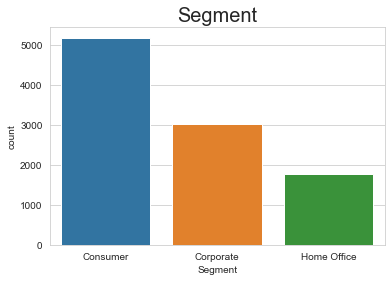

In [29]:
ax=sns.countplot(data['Segment'],data=data)
plt.xticks(rotation=0)
plt.title('Segment',fontsize=20)

Observations:
1. The largest segment belongs to Consumer and the then comes the Corporate segment and the lowest is the home office.

### Grouped Bar-Plots

In [30]:
def bar_plot(df, col1):
    temp = pd.DataFrame(data.groupby(col1)['Discount','Quantity', 'Sales', 'Profit'].sum()).reset_index()
    temp['ratio']= temp['Profit']/temp['Sales']
    print(temp.head())
    fig = plt.subplots(figsize = (18,8))
    ind = np.arange(temp.shape[0])
    width = 0.35  # the width of the bars
    #plt.subplot(211)
    temp.sort_values(by=['Sales'],inplace=True, ascending=False)
    plt.bar(ind - width/2, temp['Sales'].values, width, label='Total_sales')
    plt.bar(ind + width/2, temp['Profit'].values, width, label='Total_Profit')

    plt.ylabel('Total_Value',fontsize=15)
    plt.title('Total Sales vs Profit',fontsize=20)
    plt.xticks(ind, list(temp[col1].values),rotation=90)
    plt.legend()
    plt.show()

    #plt.subplot(212)
                       
    fig = plt.subplots(figsize = (18,8))
    temp.sort_values(by=['ratio'],inplace=True, ascending=False)
    
    plt.bar(ind,temp['ratio'].values,color='y')
    
    plt.xticks(ind,list(temp[col1].values),rotation=90)
    plt.xlabel(col1,fontsize=15)
    plt.ylabel('Ratio',fontsize=15)
    sns.set_style('whitegrid')
    plt.title('Profit n Sales Ratio',fontsize=20)
    plt.show()
    

          Category  Discount  Quantity        Sales       Profit     ratio
0        Furniture    368.59      8020  741306.3133   18421.8137  0.024850
1  Office Supplies    946.20     22861  718735.2440  122364.6608  0.170250
2       Technology    244.40      6939  836154.0330  145454.9481  0.173957


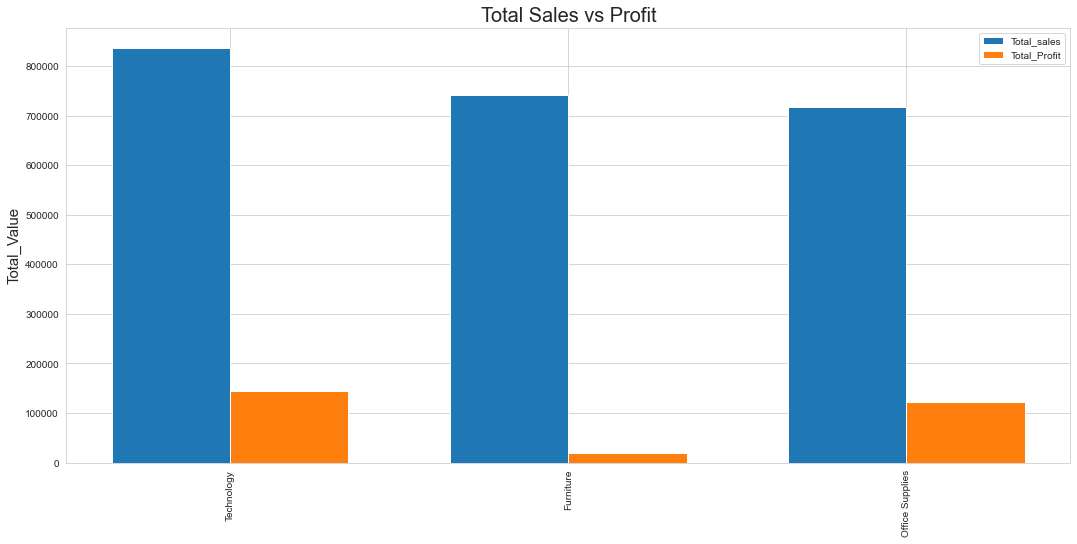

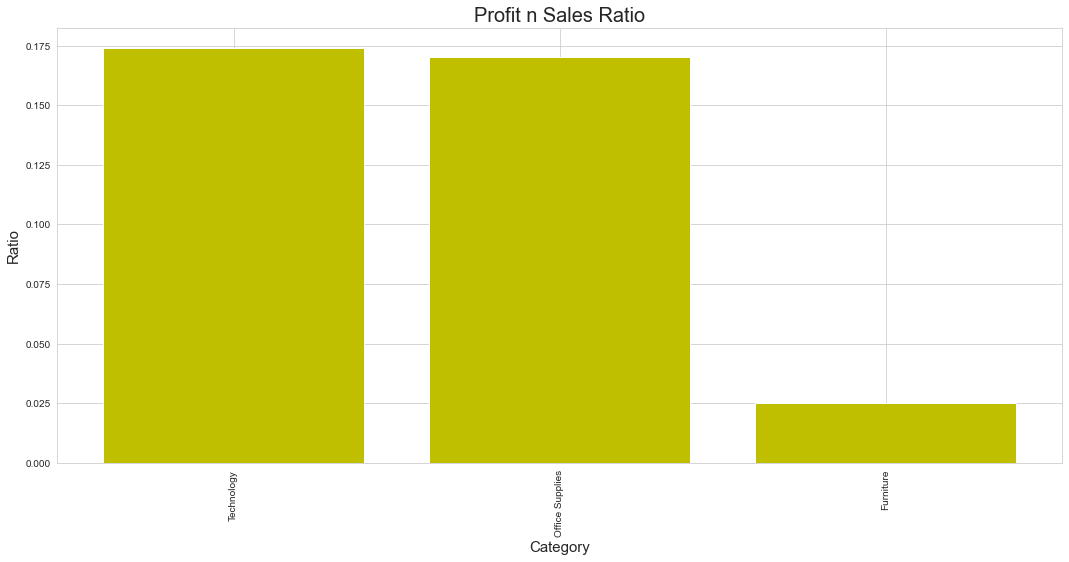

In [31]:
bar_plot(data, 'Category')

Observations:
1. From graph-1: The Sales decreases as we move from Technology to Furniture to Office Supplies and the total profit for furniture is very low.


2. From graph-2: The profit-sale ratio is high for Technology and Office supplies but is very low for Furniture. This implies that for products belonging to Technology and Office Supplies categories has much profit value than sales, whereas Furniture category has lower profit value than sales value.

  Sub-Category  Discount  Quantity        Sales      Profit     ratio
0  Accessories     60.80      2976  167380.3180  41936.6357  0.250547
1   Appliances     77.60      1729  107532.1610  18138.0054  0.168675
2          Art     59.60      2996   27107.0320   6524.6118  0.240698
3      Binders    566.20      5971  203409.1690  30228.0003  0.148607
4    Bookcases     48.14       868  114879.9963  -3472.5560 -0.030228


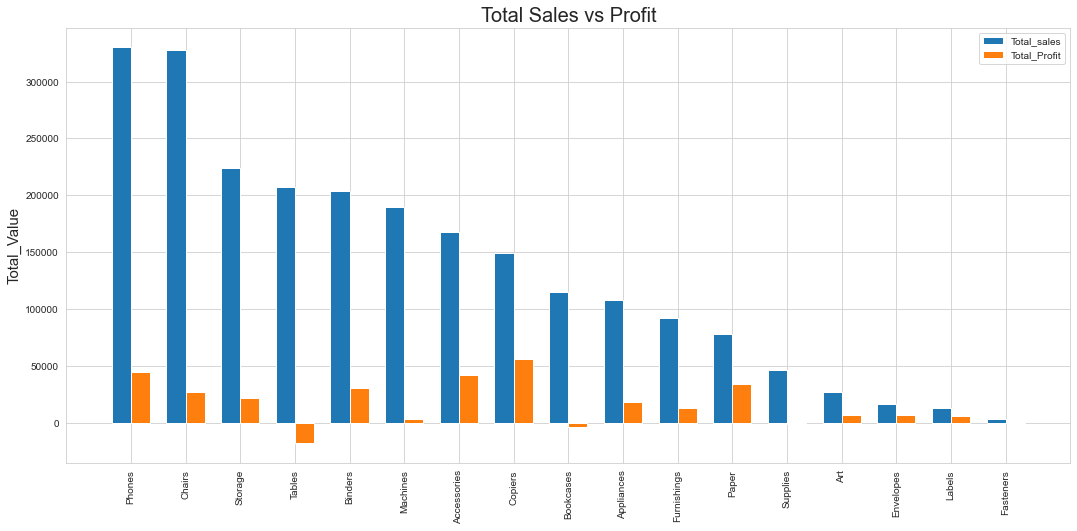

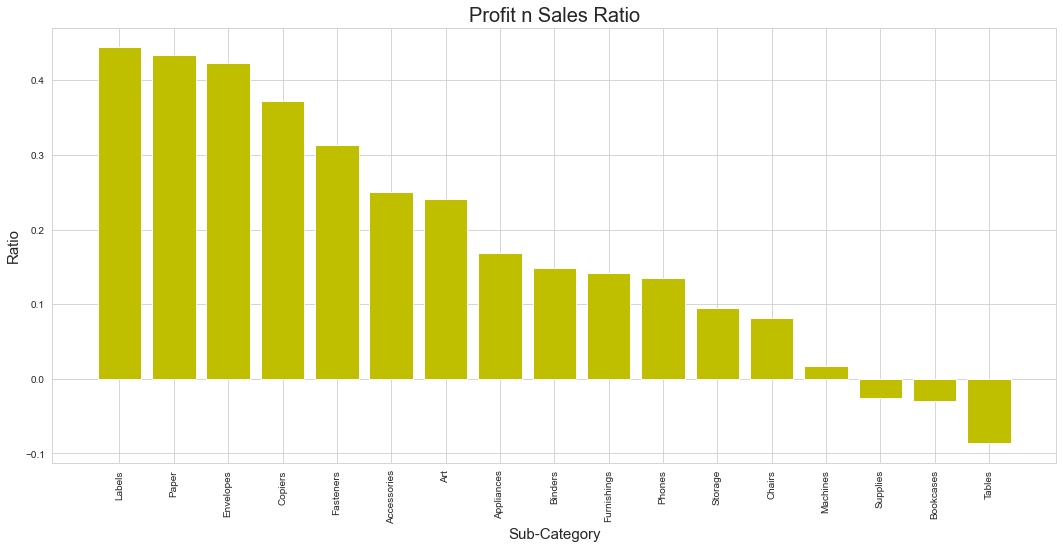

In [32]:
bar_plot(data,'Sub-Category')

Observations:
1. From graph-1, we observe that sale values of Phones and Chairs are the highest and then it is for Storage, Tables and Binders which have almost similar sale values. Total Profit values for Machines is too less as compared to sales, also total profit values for Art, Envelopes, Labels are also very low but their total sales values are also low. Total profit value for Tables and Bookcases are negative in value which implies that they are in loss.


2. From graph-2, Profit-Sales ratio for labels , paper and envelopes are high amongst all which implies that their profit values are much larger. Similarly for all other products we can see as we move forward the ratio decreases but the profit values are still large but lesser in value. The profit-sales ratio has negative value for Supplies, Bookcases and Tables which implies that these products have incurred loses and espcially the Sub-category Table has incurred most loss value.

        State  Discount  Quantity        Sales      Profit     ratio
0     Alabama       0.0       256   19510.6400   5786.8253  0.296598
1     Arizona      68.0       862   35282.0010  -3427.9246 -0.097158
2    Arkansas       0.0       240   11678.1300   4008.6871  0.343264
3  California     145.6      7649  457576.2715  76330.7891  0.166815
4    Colorado      57.6       693   32108.1180  -6527.8579 -0.203309


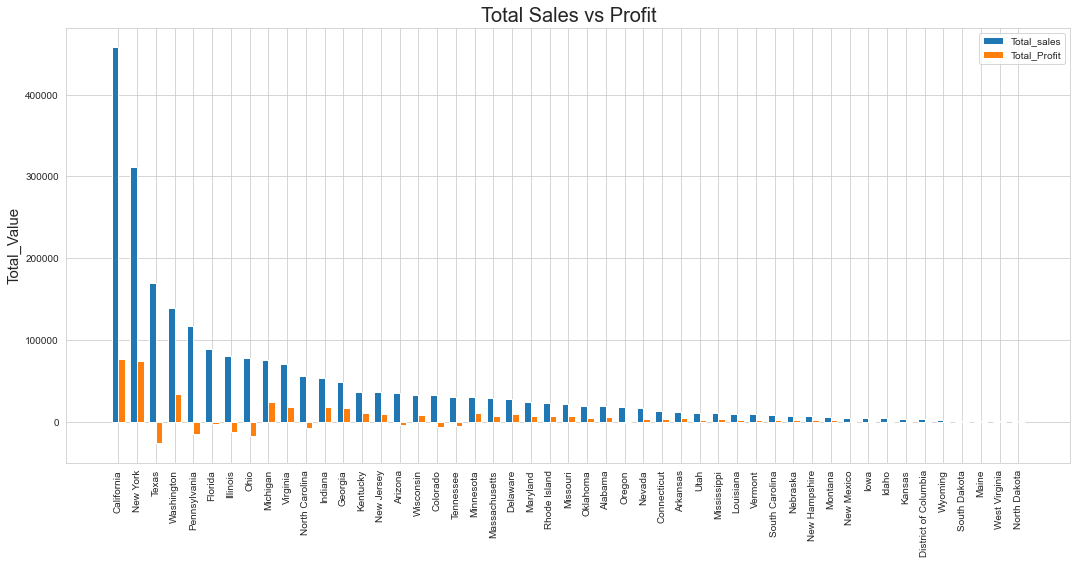

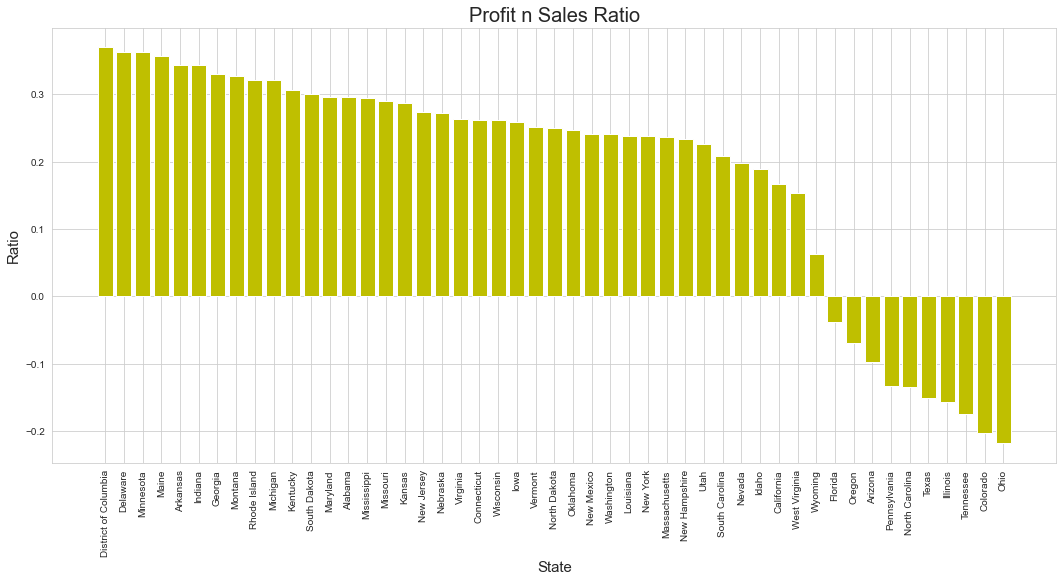

In [33]:
bar_plot(data,'State')

Observations:
1. From graph 1, the total sales value for California is the highest, New York stands at 2nd place followed by Texas, Washington and Pennsylvania. The total profit value of California and New York are also high but for Texas it is negative which means its in loss.


2. From graph 2, the Profit n sales ratios for District of Columbia , Delwara, Minnesota etc are very high, though their total sales value are very low but have gained good profit values. The ratio seems to good for maximum states. There are also few sates suffered losses such as Colorado has suffered maximum loss follwed by Tennessee, Illinois, Texas etc.

        Ship Mode  Discount  Quantity         Sales       Profit     ratio
0     First Class    252.97      5690  3.513805e+05   48953.6561  0.139318
1        Same Day     82.75      1956  1.283217e+05   15871.8869  0.123688
2    Second Class    269.35      7418  4.591770e+05   57446.6516  0.125108
3  Standard Class    954.12     22756  1.357316e+06  163969.2280  0.120804


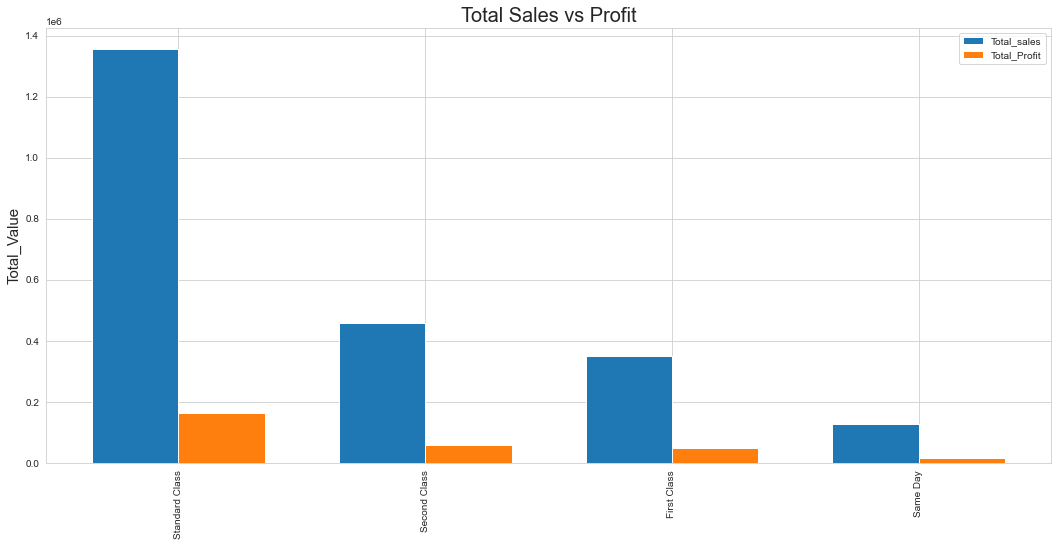

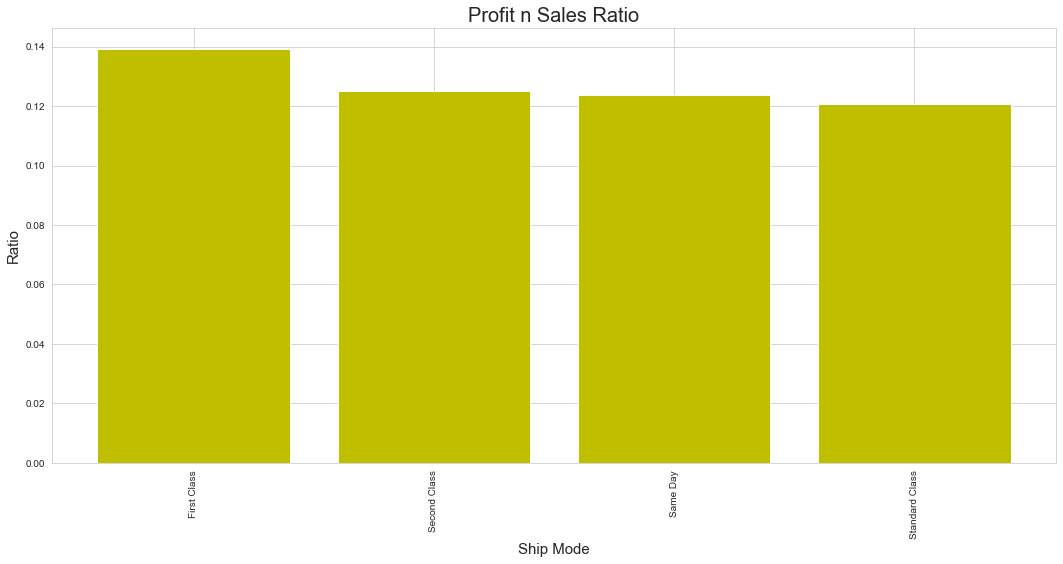

In [34]:
bar_plot(data,'Ship Mode')

Observations:
1. From graph 1, the total sales value is highest for Standard class, then Second class then First class and at last is the Same Day.


2. From graph 2, the ratio is highest for First Class, which shows it has good profit rate with respect to its sales values, Standard class has the least ratio, which means their profit rate is bit less as w.r.t their sales value. 

    Region  Discount  Quantity        Sales       Profit     ratio
0  Central    557.14      8768  500782.8528   39655.8752  0.079188
1     East    413.50     10609  678435.1960   91506.3092  0.134878
2    South    238.55      6209  391721.9050   46749.4303  0.119343
3     West    350.00     12234  725255.6365  108329.8079  0.149368


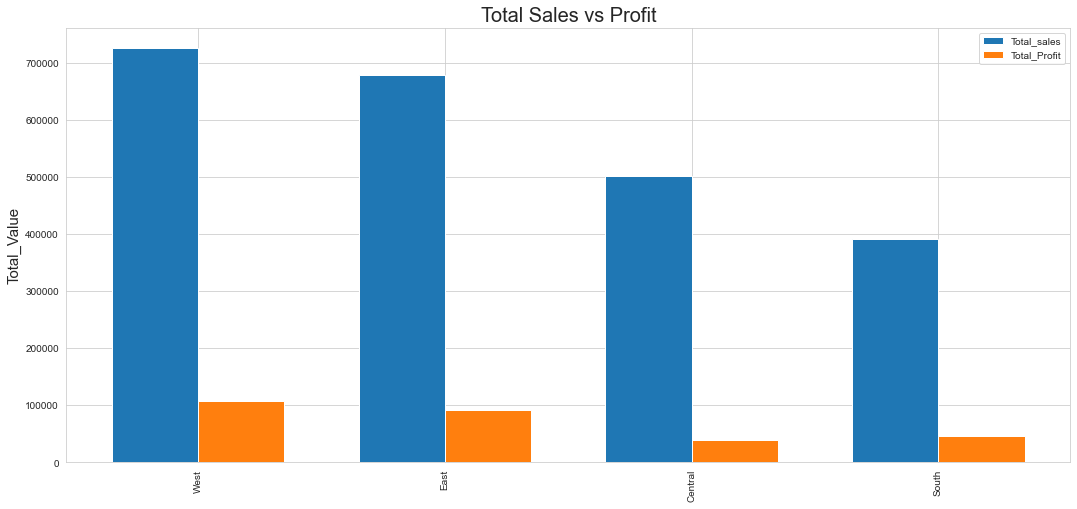

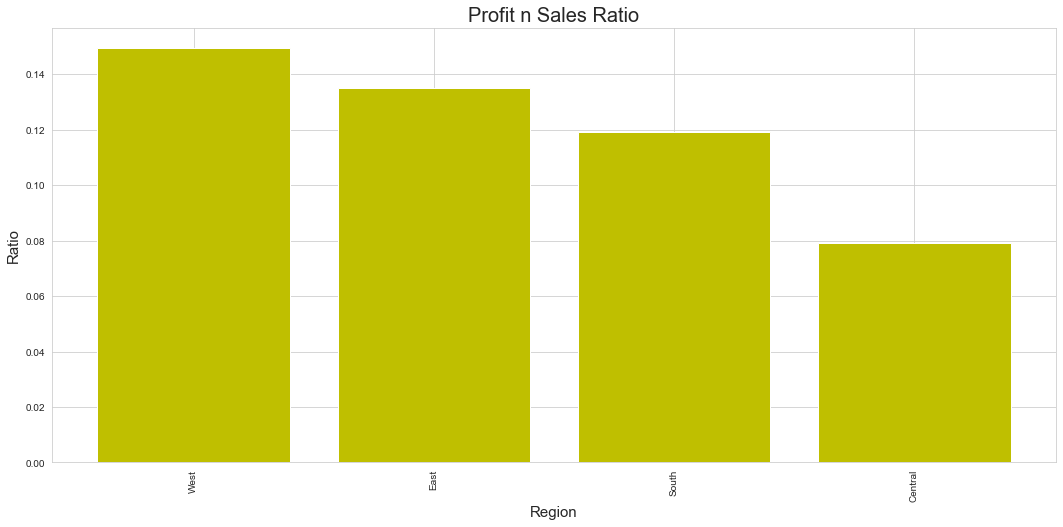

In [35]:
bar_plot(data,'Region')

Observations:
1. The total sales value for West region is the highest and it decreases as we move towards East, Central and South regions.


2. The ratio decreases as we from West to East then to South and is lowest for Central region. This dhow that the profit rate for Central region is the lowest and West region has the highest profit rate.

In [36]:
temp5 = data.groupby(['Ship Mode'])['Discount'].sum().reset_index()
temp5

Ship Mode  Discount
0     First Class    252.97
1        Same Day     82.75
2    Second Class    269.35
3  Standard Class    954.12

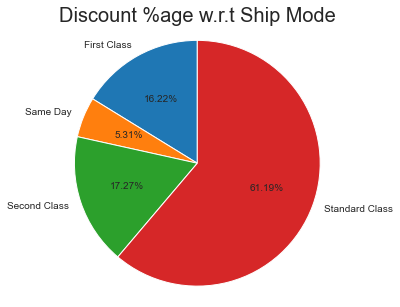

In [37]:
labels = temp5['Ship Mode'].values
sizes = temp5['Discount'].values

fig1, ax1 = plt.subplots(figsize=(6,5))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Discount %age w.r.t Ship Mode', fontsize=20)
plt.show()

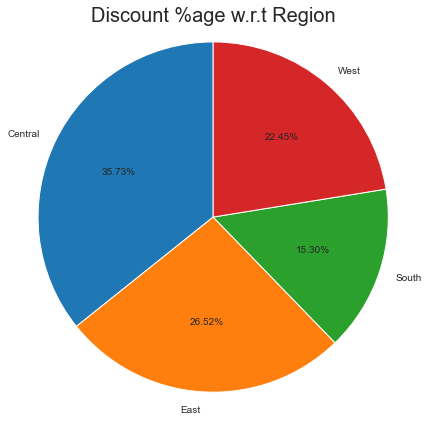

In [38]:
temp6 = data.groupby(['Region'])['Discount'].sum().reset_index()
temp6
labels = temp6['Region'].values
sizes = temp6['Discount'].values

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Discount %age w.r.t Region', fontsize=20)
plt.show()

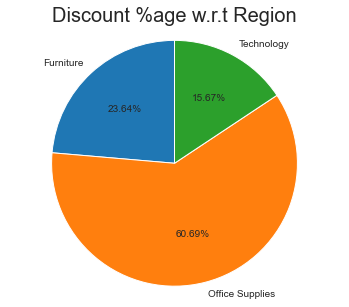

In [39]:
temp6 = data.groupby(['Category'])['Discount'].sum().reset_index()
temp6
labels = temp6['Category'].values
sizes = temp6['Discount'].values

fig1, ax1 = plt.subplots(figsize=(6,5))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Discount %age w.r.t Region', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Number of Ship Mode according to Segment')

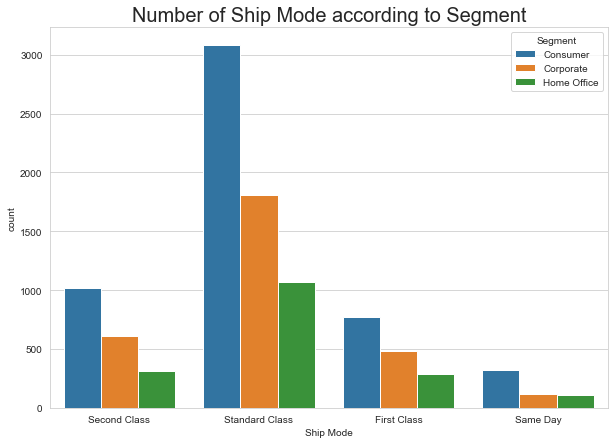

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(data=data, x= 'Ship Mode', hue= 'Segment')
plt.title('Number of Ship Mode according to Segment', fontsize=20)

Observations:
1. For all the segments, maximum shipping is done by Standard Class ship mode and the lowest number of shipping is done on the Sane day.
2. Second class and First class shipping modes are under 1000 in number.
3. Consumer segment stays ahead in all types of shipping mode, Corporate is in second number and Home office segment in third position. This implies that most of the shipping are done to the Consumer segment.
4. Most commonly used ship mode is Standard Class.

Text(0.5, 1.0, 'Number of Ship Mode according to Region ')

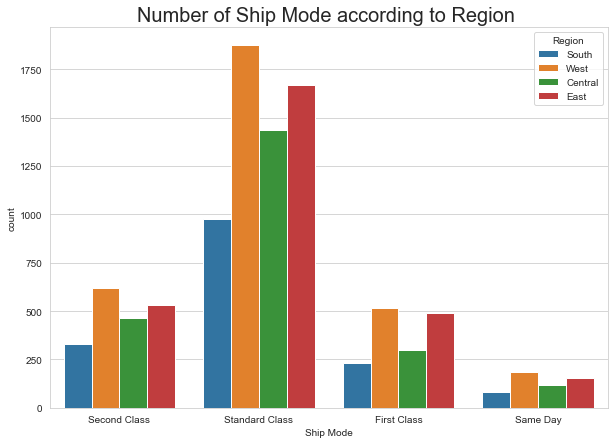

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(data=data, x= 'Ship Mode', hue= 'Region')
plt.title('Number of Ship Mode according to Region ', fontsize=20)

Observations:
1. Most commonly used ship mode for all the regions is Standard Class and the least one used is Same Day mode.
2. The West region has highest count for all modes of shipping while South has the least count. We can conclude that most sales are done in the South and East regions.

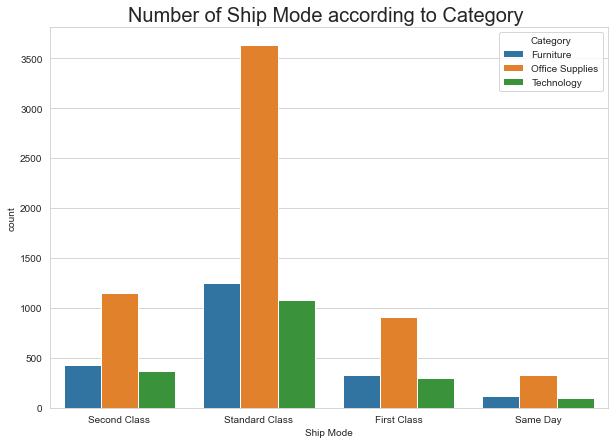

In [42]:
plt.figure(figsize=(10,7))
sns.countplot(data=data, x= 'Ship Mode', hue= 'Category')
plt.title('Number of Ship Mode according to Category ', fontsize=20)
plt.show()

Observations:
1. Standard class ship mode is most common for all the categories.
2. Office supplies has highest count for all types of shipping, which shows that most of the sales are for Office supplies.